In [1]:
#Import Packages
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets

#read in the data
df = pd.read_csv('Mumin.csv', encoding='latin-1')

#List it in a combo box
options = df["Player"].unique()
options = options.tolist()

options = [x for x in options if str(x) != 'nan']
playerlist = widgets.Combobox(
    placeholder='Enter a name',
    options=options,
    description='Player:',
    ensure_option=True,
    disabled=False
)
playerlist

FileNotFoundError: [Errno 2] No such file or directory: 'Mumin.csv'

In [ ]:
player = playerlist.value
team = df.loc[(df['Player'] == player)]

#Idenitft teams
t = []
for i in team.Team.unique():
    t.append(i)

squad = t[0]
squad

In [ ]:
df = df[(df['Player']=='A. Mumin') | (df['Player']==player)].reset_index()
df = df.drop(['index','Team'],axis=1)

#get parameters
params = list(df.columns)
params = params[1:]
params

In [ ]:
df

In [ ]:
#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []
low = []
high = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    low.append(a)
    
    b = max(df[params][x])
    b = b + (b*.25)
    high.append(b)
    
    ranges.append((a,b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == 'A. Mumin':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == player:
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]
values

In [ ]:
radar = Radar(params, low, high,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

def radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14):
    """ Create a Radar chart flanked by a title and endnote axes.

    Parameters
    ----------
    radar_height: float, default 0.915
        The height of the radar axes in fractions of the figure height (default 91.5%).
    title_height: float, default 0.06
        The height of the title axes in fractions of the figure height (default 6%).
    figheight: float, default 14
        The figure height in inches.

    Returns
    -------
    fig : matplotlib.figure.Figure
    axs : dict[label, Axes]
    """
    if title_height + radar_height > 1:
        error_msg = 'Reduce one of the radar_height or title_height so the total is ≤ 1.'
        raise ValueError(error_msg)
    endnote_height = 1 - title_height - radar_height
    figwidth = figheight * radar_height
    figure, axes = plt.subplot_mosaic([['title'], ['radar'], ['endnote']],
                                      gridspec_kw={'height_ratios': [title_height, radar_height,
                                                                     endnote_height],
                                                   # the grid takes up the whole of the figure 0-1
                                                   'bottom': 0, 'left': 0, 'top': 1,
                                                   'right': 1, 'hspace': 0},
                                      figsize=(figwidth, figheight))
    axes['title'].axis('off')
    axes['endnote'].axis('off')
    return figure, axes

# creating the figure using the function defined above:
fig, axs = radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(a_values, b_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=12, fontfamily='Courier New')
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontweight='bold',fontfamily='Courier New')
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'All Stats per90', fontsize=15,
                                    fontweight='bold',fontfamily='Courier New', ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Abdul Mumin', fontsize=25, color='#01c49d',
                                 fontweight='bold',fontfamily='Courier New', ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Vitória S.C.', fontsize=20,
                                 fontweight='bold',fontfamily='Courier New',
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, player, fontsize=25,
                                 fontweight='bold',fontfamily='Courier New',
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, squad, fontsize=20,
                                 fontweight='bold',fontfamily='Courier New',
                                ha='right', va='center', color='#d80499')

# Manual

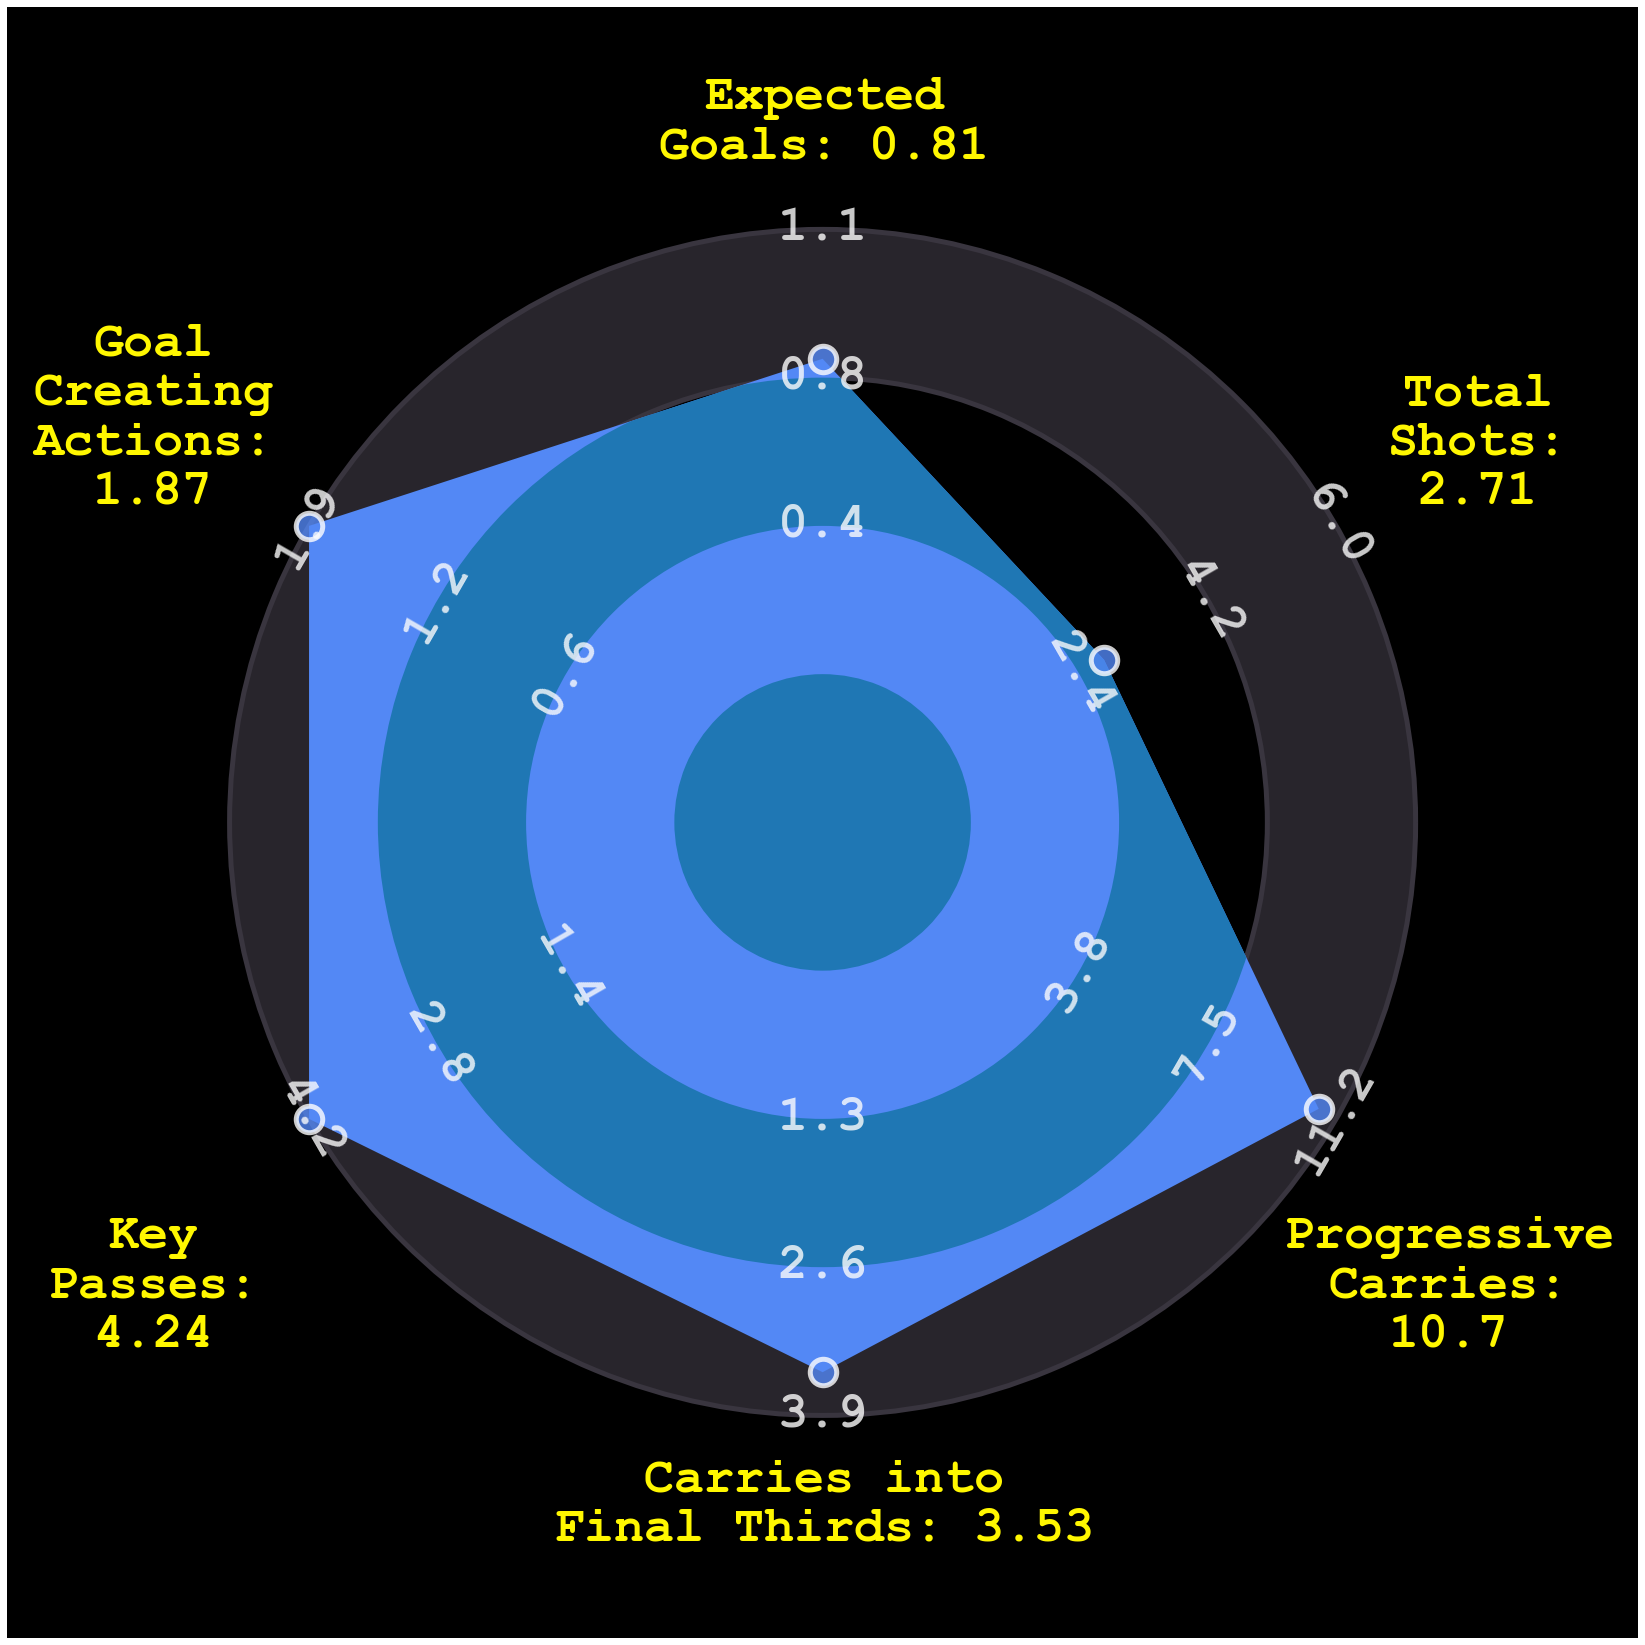

In [5]:
#Import Packages
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets

#fig.set_facecolor('#171c38')

params = ["Expected Goals", "Shots", "Progressive Carries", 
          "Carries into Final Thirds", "Key Passes", "GCA"]

# The lower and upper boundaries for the statistics
low =  [0.03, 0.54, 0.17, 0.00, 0.00, 0.00]
high = [1.13, 6.00, 11.2, 3.91, 4.24, 1.87]
player_values  = [0.81, 2.71, 10.7, 3.53, 4.24, 1.87]

radar = Radar(params, low, high,
              round_int=[False]*len(params),
              num_rings=3, ring_width=1, center_circle_radius=1)

# plot radar
fig, ax = radar.setup_axis(figsize=(40,30),  facecolor='black')
rings_inner = radar.draw_circles(ax=ax, facecolor='#28252c', edgecolor='#39353f', lw=5)
radar_output = radar.draw_radar(player_values, ax=ax, kwargs_radar={'facecolor': '#5388f5', 'lw':5})

radar_poly, rings_outer, vertices = radar_output

range_labels = radar.draw_range_labels(ax=ax, color='#fcfcfc',fontsize=50, alpha=0.8,
                                       fontweight='bold', fontfamily='Courier New')

# add label
fig.text(
    0.513, 0.81, "Expected\nGoals: 0.81", size=50, fontweight='bold', fontfamily='Courier New', color="#FFF700",ha='center'
)

fig.text(
    0.74, 0.65, "Total\nShots:\n2.71", size=50, fontweight='bold', fontfamily='Courier New', color="#FFF700",ha='center'
)

fig.text(
    0.73, 0.26, "Progressive\nCarries:\n10.7", size=50, fontweight='bold', fontfamily='Courier New', color="#FFF700",ha='center'
)

fig.text(
    0.513, 0.17, "Carries into\nFinal Thirds: 3.53", size=50, fontweight='bold', fontfamily='Courier New', color="#FFF700",ha='center'
)

fig.text(
    0.28, 0.26, "Key\nPasses:\n4.24", size=50, fontweight='bold', fontfamily='Courier New', color="#FFF700",ha='center'
)

fig.text(
    0.28, 0.65, "Goal\nCreating\nActions:\n1.87", size=50, fontweight='bold', fontfamily='Courier New', color="#FFF700",ha='center'
)

ax.scatter(vertices[:, 0], vertices[:, 1],
           c='#5388f5', edgecolors='#FFFFFF', marker='o', s=700, zorder=2, lw=5, alpha=0.8)


plt.show()